## 基礎題 - 算出斜率w與截距b

y = wx + b

記得計算前X須符合資料格式
$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

MSE = 0.26268
Coefficients: [1.61701852]
Interception: 0.27313


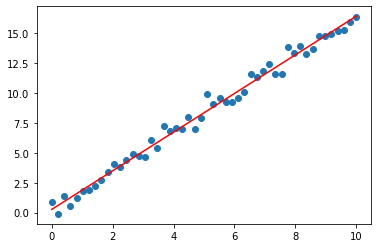

In [7]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
from sklearn.linear_model import LinearRegression
#將模型工具指派給一變數做使用
regr_lin = LinearRegression()
#注意轉換x得格式1D->2D
X = x.reshape(-1, 1)
#將x,y資料導入LinearRegression演算法做訓練
regr_lin.fit(X, y)
Y = regr_lin.predict(X)
plt.scatter(x, y)
plt.plot(x, Y, c = "r")
MSE = np.sum((Y - y) ** 2) / len(y)
print(f"MSE = {MSE:.5f}")
#列印出訓練完成之函數的斜率與截距
print(f"Coefficients: {regr_lin.coef_}")
print(f"Interception: {regr_lin.intercept_:.5f}")

## 進階題 - 切割資料集分別做訓練與預測(訓練資料80%、測試資料20%)


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])


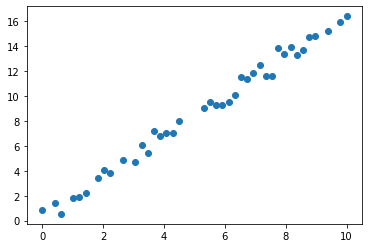

In [4]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
from sklearn.linear_model import LinearRegression
#匯入在sklearn.model_selection套件裡面的train_test_split模組
from sklearn.model_selection import train_test_split
#切割數據集(訓練資料80%、測試資料20%，設定random_state=20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)
#畫出訓練資料集的matplotlib圖形m
plt.scatter(x_train, y_train)

## 用訓練資料來 fit 函數
1. 只用訓練資料集的資料進行linear regression演算法<br>
2. 並計算出訓練階段的MSE
3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_train.PNG)

In [9]:
regr = LinearRegression()
X_train = x_train.reshape(-1, 1)
regr.fit(X_train, y_train)
print(f"Coefficients: {regr.coef_}")
print(f"Interception: {regr.intercept_:.5f}")
Y_train = regr.predict(X_train)
print(Y_train)

Coefficients: [1.60659227]
Interception: 0.36803
[13.48306479  5.94191739  6.26979336  0.36802582  9.22067712 11.18793297
 12.1715609  14.13881673  3.64678557  1.35165374 13.81094076  4.63041347
 15.45032063  1.02377777 12.82731284 13.1551888   2.00740568 14.4666927
 12.49943687 10.20430504  2.33528167  9.87642907  5.6140414   6.59766933
 16.43394855 14.79456869  7.25342128 10.86005698 11.51580894  2.66315764
  7.58129725  3.97466154  6.9255453   3.31890958 16.10607258  9.54855309
 10.53218101  5.28616543  8.89280115 11.84368491]


In [10]:
MSE = np.sum((Y_train - y_train) ** 2) / len(y_train)
print(f"MSE = {MSE:.5f}")

MSE = 0.22845


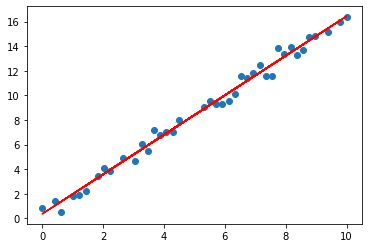

In [11]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, c = "r")

## 將訓練出來的函數預測測試集的X值
1. 使用剛剛訓練出來的模型進行測試資料集的資料預測*注意reshape<br>
使用X = 2.44897959，預測出來數值應該為 4.3025375<br>
所有測試集資料
$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [25]:
X_test = x_test.reshape(-1, 1)
Y_test = regr.predict(X_test)
print(Y_test)
print(X_test)

[ 4.04041407  4.70780434  1.37085303  2.70563355 15.05235335  0.36976764
  8.37845076  8.04475562 15.7197436   7.7110605 ]
[[2.44897959]
 [2.85714286]
 [0.81632653]
 [1.63265306]
 [9.18367347]
 [0.20408163]
 [5.10204082]
 [4.89795918]
 [9.59183673]
 [4.69387755]]


In [26]:
regr.fit(X_test, y_test)
print(f"Coefficients: {regr.coef_}")
print(f"Interception: {regr.intercept_:.5f}")

Coefficients: [1.63510614]
Interception: 0.03607


In [34]:
X_t = 2.44897959
W = regr.coef_
b = regr.intercept_
y = X_t * W + b
print(f"y = {y}")

y = [4.04041407]


2. 並計算出測試階段的MSE

In [35]:
MSE = np.sum((Y_test - y_test) ** 2) / len(y_test)
print(f"MSE = {MSE:.5f}")

MSE = 0.36005


3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_test.PNG)

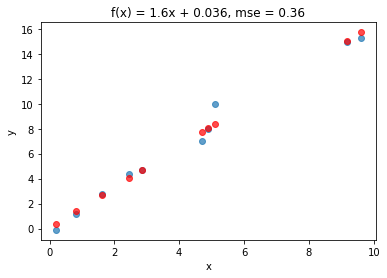

In [37]:
title = "f(x) = 1.6x + 0.036, mse = 0.36"
plt.title(title)
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_test, y_test, alpha = 0.7, label = "Ground True")
plt.scatter(x_test, Y_test, alpha = 0.7, label = "Predict", c = "r")